In [1]:
# CART Models - Classification and Regression Technique - Both as 
# Regression Model and Classficiation Model.
# Tree Based Models - Single Tree Model - Decision Tree
# Output is a Tree that has root node, decision nodes and terminal nodes or
# leaf.
# Decision Tree is a binary splitting and recursive partitioning tree.
# Recursive partitioning is where tree splits on previous node number of
# observations. 
# Tree growth will stop once observations are classified into leaf or
# terminal nodes.

# Tree Splitting Methods
#1) Gini Method - 1-sum(prob(i)^2). Probability = Number of Events/TotalEvents
# Lowest gini will be first split and ascending order till 0.40. Gini>0.40
# variable will be deleted from tree.

#2) Entropy and Information gain Method - 
# Entropy = sum(-prob(i)*Log2prob(i))
# Information Gain = Entropy of Dependent Variable - Entropy of Variable
# Highest Information gain is first split and descending order till 0.50
# Information gain less than 0.50, variable will be deleted from tree.

# 3) Standard Variance Reduction Method for Decision tree as Regression 
# model

# Decision Tree is non parametric algorithm which doesnot have any prior
# assumptions. It works on Large data with outliers and missing values
# and easy to interpret.

# The only weakness of decision tree is overfitting. Model will definitely
# overfit. Overfit means on training data very good accuracy or less RMSE
# but upon repeated testing with subsets of data accuracy will drastically
# reduce and RMSE will drastically increase.
# To overcome this max_depth of tree must be defined.

# Decision Tree can also be used as unsupervised learning algorithm as
# output provides variable or feature importance

# Decision Tree must be read Top Down not Bottom Up. Rules will be created
# from tree and these rules are used for prediction. Rule Based prediction

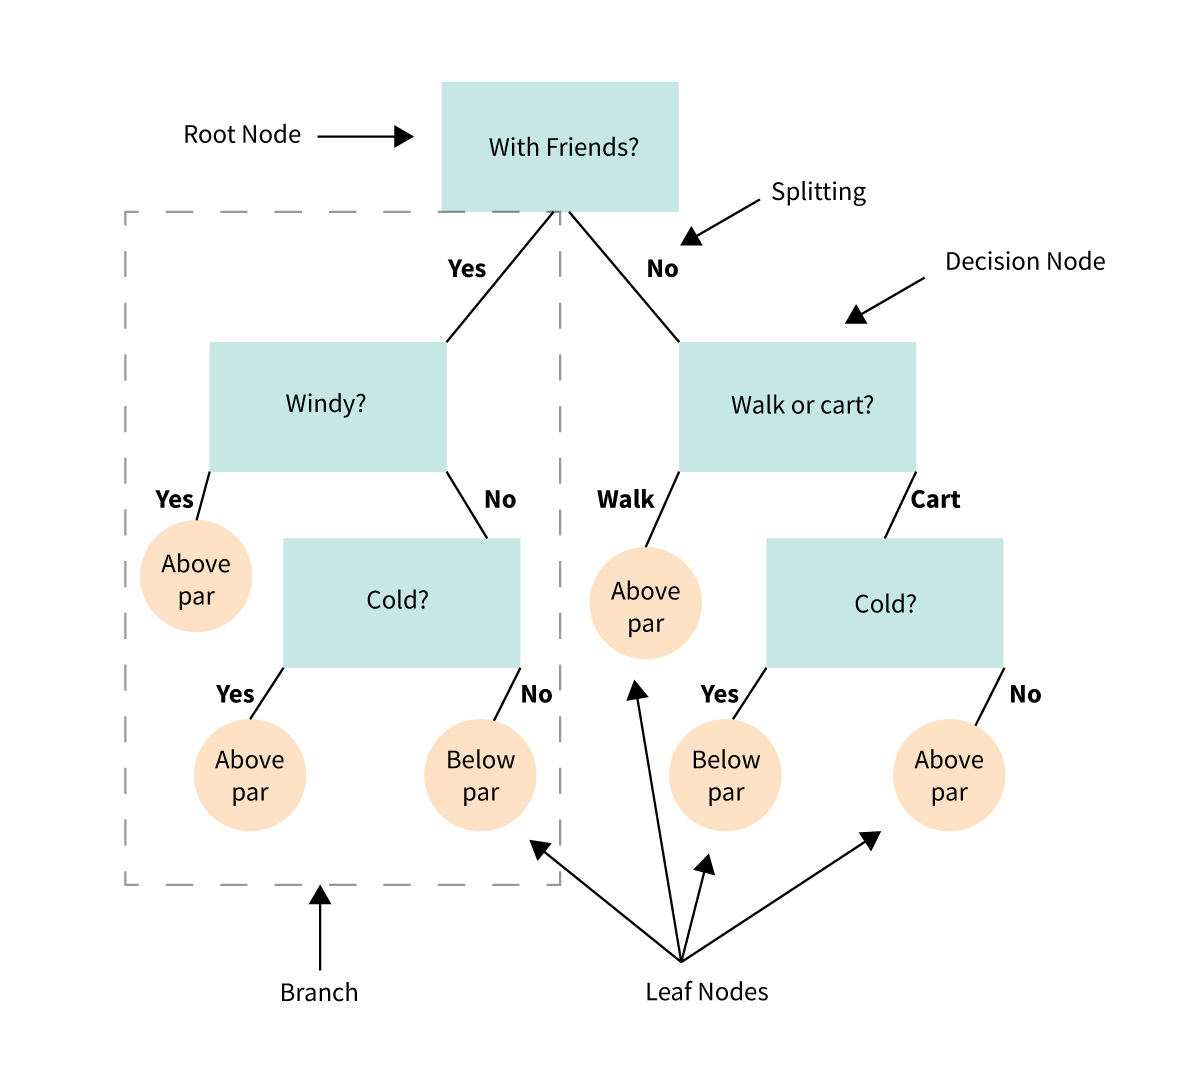

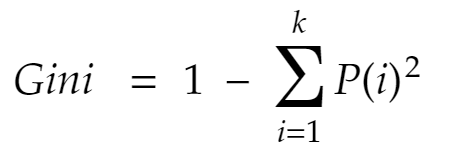
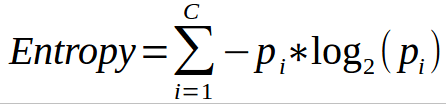
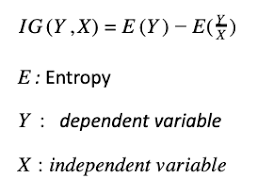

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import io
%cd "C:\Users\Rajesh\Desktop\Hackathon\HousePrice Prediction"

C:\Users\Rajesh\Desktop\Hackathon\HousePrice Prediction


In [4]:
housetrain=pd.read_csv("train.csv")

In [5]:
housetest=pd.read_csv("test.csv")

In [6]:
print(housetrain.shape)
print(housetest.shape)

(1460, 81)
(1459, 80)


In [7]:
housetrain.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [8]:
housetest.isnull().sum().sort_values(ascending=False)

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
FireplaceQu       730
                 ... 
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
SaleCondition       0
Length: 80, dtype: int64

In [9]:
# Added Dependent variable to test Data for Row wise Concatenation
housetest['SalePrice']='test'

In [10]:
# Row wise concatenation
combinedf=pd.concat([housetrain,housetest],axis=0)

In [11]:
# Split data into ObjectColumns and NumericColumns
objectcolumns=combinedf.select_dtypes(include=['object'])
numericcolumns=combinedf.select_dtypes(include=np.number)

In [12]:
print(objectcolumns.shape)
print(numericcolumns.shape)

(2919, 44)
(2919, 37)


In [13]:
objectcolumns.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
GarageCond        159
GarageQual        159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MSZoning            4
Utilities           2
Functional          2
Exterior2nd         1
Electrical          1
SaleType            1
Exterior1st         1
KitchenQual         1
RoofStyle           0
Neighborhood        0
SaleCondition       0
ExterQual           0
LotShape            0
LandContour         0
ExterCond           0
PavedDrive          0
LotConfig           0
LandSlope           0
Condition1          0
HouseStyle          0
Condition2          0
Foundation          0
RoofMatl            0
Street              0
CentralAir          0
HeatingQC           0
Heating             0
BldgType            0
SalePrice           0
dtype: int64

In [14]:
# Since variables - PoolQC,MiscFeature,Alley,Fence, FireplaceQu has morethan
# 50% NA or missing values - impute with word 'missing'
missingcols=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']

In [15]:
for col in missingcols:
    objectcolumns[col]=objectcolumns[col].fillna("missing")

C:\Users\Rajesh\AppData\Local\Temp/ipykernel_14700/265518070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objectcolumns[col]=objectcolumns[col].fillna("missing")


In [16]:
for col in objectcolumns.columns:
    freq=objectcolumns[col].value_counts(dropna=False)
    print(freq)

RL         2265
RM          460
FV          139
RH           26
C (all)      25
NaN           4
Name: MSZoning, dtype: int64
Pave    2907
Grvl      12
Name: Street, dtype: int64
missing    2721
Grvl        120
Pave         78
Name: Alley, dtype: int64
Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64
AllPub    2916
NaN          2
NoSeWa       1
Name: Utilities, dtype: int64
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64
Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker   

In [17]:
numericcolumns['SalePrice']=objectcolumns.SalePrice

C:\Users\Rajesh\AppData\Local\Temp/ipykernel_14700/2183195458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericcolumns['SalePrice']=objectcolumns.SalePrice


In [18]:
numericcolumns.SalePrice.tail()

1454    test
1455    test
1456    test
1457    test
1458    test
Name: SalePrice, dtype: object

In [19]:
objectcolumns=objectcolumns.drop('SalePrice',axis=1)

In [20]:
from sklearn.impute import SimpleImputer

In [21]:
imputer=SimpleImputer(strategy="most_frequent")

In [22]:
objectcolumnsimputed=imputer.fit_transform(objectcolumns)

In [23]:
objectcolumnsimputed=pd.DataFrame(objectcolumnsimputed,
                                 columns=objectcolumns.columns)

In [24]:
objectcolumnsimputed.isnull().sum().sort_values(ascending=False)

MSZoning         0
FireplaceQu      0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
BsmtCond         0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
BsmtExposure     0
BsmtQual         0
Street           0
Condition2       0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
BldgType         0
Foundation       0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
SaleCondition    0
dtype: int64

In [25]:
numericcolumns.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [26]:
categorycolumns=numericcolumns[['OverallQual','OverallCond', 'YearBuilt', 
                                'YearRemodAdd','GarageYrBlt','MoSold', 
                                'YrSold']]

In [27]:
numericcolumns=numericcolumns.drop(['OverallQual','OverallCond', 'YearBuilt', 
                                'YearRemodAdd','GarageYrBlt','MoSold', 
                                'YrSold'],axis=1)

In [28]:
print(objectcolumnsimputed.shape)
print(categorycolumns.shape)
print(numericcolumns.shape)

(2919, 43)
(2919, 7)
(2919, 31)


In [29]:
numericcolumns.LotFrontage=numericcolumns.LotFrontage.fillna(
numericcolumns.LotFrontage.median())

In [30]:
for col in numericcolumns.columns.drop('SalePrice'):
    numericcolumns[col]=numericcolumns[col].fillna(
        numericcolumns[col].median())

In [31]:
categorycolumnsimputed=imputer.fit_transform(categorycolumns)

In [32]:
categorycolumnsimputed=pd.DataFrame(categorycolumnsimputed,
                                   columns=categorycolumns.columns)

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le=LabelEncoder()

In [35]:
objectcolumnsdummy=objectcolumnsimputed.apply(le.fit_transform)

In [36]:
categorycolumnsdummy=categorycolumnsimputed.apply(le.fit_transform)

In [37]:
numericcolumns=numericcolumns.reset_index(drop=True)

In [38]:
objectcolumnsdummy=objectcolumnsdummy.reset_index(drop=True)

In [39]:
categorycolumnsdummy=categorycolumnsdummy.reset_index(drop=True)

In [40]:
combinedfclean=pd.concat([numericcolumns,objectcolumnsdummy,
                          categorycolumnsdummy],axis=1)

In [41]:
# Split Data into train and test
housetraindf=combinedfclean[combinedfclean.SalePrice!='test']
housetestdf=combinedfclean[combinedfclean.SalePrice=='test']

In [42]:
print(housetraindf.shape)
print(housetestdf.shape)

(1460, 81)
(1459, 81)


In [43]:
housetestdf=housetestdf.drop('SalePrice',axis=1)

In [44]:
y=housetraindf.SalePrice
X=housetraindf.drop(['SalePrice','Id'],axis=1)

In [45]:
y=y.astype('float64')

In [ ]:
# Create Histogram, boxplot and density curve for dependent variabe y

<AxesSubplot:ylabel='Frequency'>

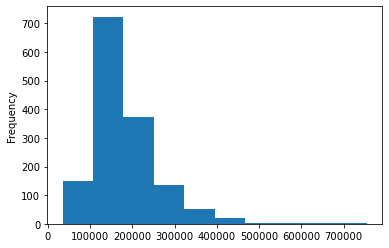

In [52]:
y.plot(kind='hist')

<AxesSubplot:>

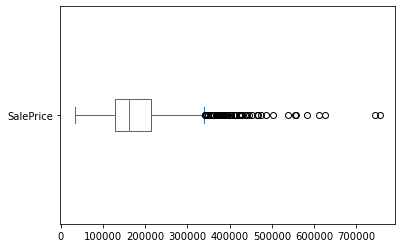

In [53]:
y.plot(kind='box',vert=False)

<AxesSubplot:ylabel='Density'>

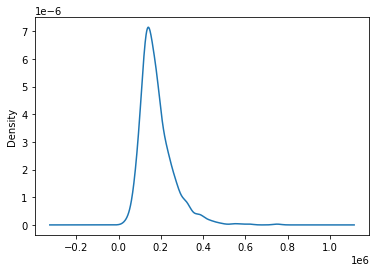

In [54]:
y.plot(kind='density')

In [ ]:
# Positive Skewness - Logarthmic Transformation

<AxesSubplot:>

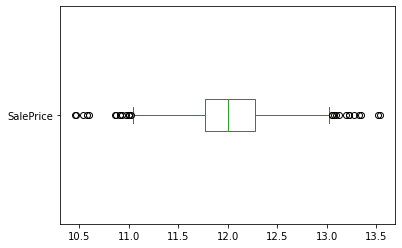

In [55]:
np.log(y).plot(kind='box',vert=False)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
reg=LinearRegression()

In [58]:
regmodel=reg.fit(X,y)

In [59]:
regmodel.score(X,y) # R Square 0.60 - 0.95

0.8545634224507179

In [60]:
regmodel.intercept_

248745.8900448589

In [61]:
print(list(zip(X.columns,regmodel.coef_)))

[('MSSubClass', -111.80482947005181), ('LotFrontage', -168.54301130931114), ('LotArea', 0.4257787586044808), ('MasVnrArea', 33.77972700762224), ('BsmtFinSF1', 4.124639725507034), ('BsmtFinSF2', 5.6532522809334225), ('BsmtUnfSF', -3.5822596341990725), ('TotalBsmtSF', 6.195632111641441), ('1stFlrSF', 23.34568000212279), ('2ndFlrSF', 20.104609460977656), ('LowQualFinSF', -19.466221489896597), ('GrLivArea', 23.984068416187085), ('BsmtFullBath', 6711.430898326835), ('BsmtHalfBath', -750.8323388946775), ('FullBath', 2992.0455483267306), ('HalfBath', -70.68800263631483), ('BedroomAbvGr', -3229.62473190198), ('KitchenAbvGr', -11894.423918963395), ('TotRmsAbvGrd', 3516.2548784824435), ('Fireplaces', 3097.688715848611), ('GarageCars', 11501.965936148197), ('GarageArea', -6.946882350709661), ('WoodDeckSF', 19.657153798119197), ('OpenPorchSF', -4.298367919125932), ('EnclosedPorch', -1.8878259444422838), ('3SsnPorch', 29.40042464536153), ('ScreenPorch', 44.03860374773748), ('PoolArea', -281.2022789

In [64]:
housetestdf=housetestdf.drop('Id',axis=1)

In [65]:
regtestpredict=regmodel.predict(housetestdf)

In [66]:
regtestpredict

array([106189.76326881, 156987.78817192, 167242.08767411, ...,
       143662.33304422, 115297.31625419, 242815.16584994])

In [67]:
pd.DataFrame(regtestpredict).to_csv("reg.csv") # write test predictions -csv

In [68]:
# Impact of Logarthmic Transformation
regmodel2=reg.fit(X,np.log(y))

In [69]:
regmodel2.score(X,np.log(y))

0.8878960435064192

In [70]:
reglogpredict=regmodel2.predict(housetestdf)

In [72]:
np.exp(reglogpredict)

array([116427.50595598, 156670.35705991, 166136.43801705, ...,
       153094.51135758, 116083.49210687, 241087.06424904])

In [73]:
pd.DataFrame(np.exp(reglogpredict)).to_csv("reglog.csv")

In [74]:
from sklearn.tree import DecisionTreeRegressor

In [96]:
tree=DecisionTreeRegressor(max_depth=6)

In [97]:
treemodel=tree.fit(X,y)

In [98]:
treemodel.score(X,y)

0.9062567454058851

In [99]:
treepredict=treemodel.predict(housetestdf)

In [100]:
treepredict

array([128881.04487179, 141044.80645161, 177793.80203046, ...,
       141044.80645161, 109902.06097561, 195035.71428571])

In [102]:
pd.DataFrame(treepredict).to_csv("tree.csv")

In [103]:
from sklearn.model_selection import cross_val_score

In [104]:
cross_val_score(tree,X,y) # Cross Validation repeatedly tests model 
# 5 times(default cv=5) with randomly selected subsets of dataset

array([0.71625463, 0.75266948, 0.79341444, 0.73580841, 0.6145673 ])

In [105]:
cross_val_score(reg,X,np.log(y)) # Multiple Linear Regression - 0.88789

array([0.89675964, 0.85963046, 0.88580171, 0.88307502, 0.72771459])

In [106]:
# Decision Tree - Only Disadvantage is Overfitting & To reduce overfitting
#1) Apply Pruning - Cutting the sub branches of tree based on complexity
# parameter
#2)max_depth will be between 1 to 32. Reduce the max_depth
#3)min_sample_split - minimum number of samples required to split an internal
# node. 0%(overfitting) to 100%(underfitting)
#4)min_samples_leaf - minimum number of samples required to be in leaf

# Random Forest algorithm which is developed exclusively to overcome
# overfitting in decision tree must be used.

In [107]:
from sklearn.tree import plot_tree

In [108]:
tree2=DecisionTreeRegressor(max_depth=3)

In [109]:
tree2model=tree2.fit(X,y)

[Text(0.5, 0.875, 'OverallQual <= 6.5\nsquared_error = 6306788585.349\nsamples = 1460\nvalue = 180921.196'),
 Text(0.25, 0.625, 'OverallQual <= 5.5\nsquared_error = 2426928665.05\nsamples = 1231\nvalue = 157832.433'),
 Text(0.125, 0.375, 'GrLivArea <= 1378.5\nsquared_error = 1411538921.037\nsamples = 912\nvalue = 140383.976'),
 Text(0.0625, 0.125, 'squared_error = 837746927.031\nsamples = 564\nvalue = 124907.778'),
 Text(0.1875, 0.125, 'squared_error = 1324189529.34\nsamples = 348\nvalue = 165466.089'),
 Text(0.375, 0.375, 'GrLivArea <= 1941.0\nsquared_error = 1971049955.987\nsamples = 319\nvalue = 207716.423'),
 Text(0.3125, 0.125, 'squared_error = 1243894899.002\nsamples = 239\nvalue = 194238.745'),
 Text(0.4375, 0.125, 'squared_error = 1979517700.562\nsamples = 80\nvalue = 247980.988'),
 Text(0.75, 0.625, 'OverallQual <= 7.5\nsquared_error = 8893038849.977\nsamples = 229\nvalue = 305035.9'),
 Text(0.625, 0.375, 'GrLivArea <= 1971.5\nsquared_error = 4058765722.773\nsamples = 168\nval

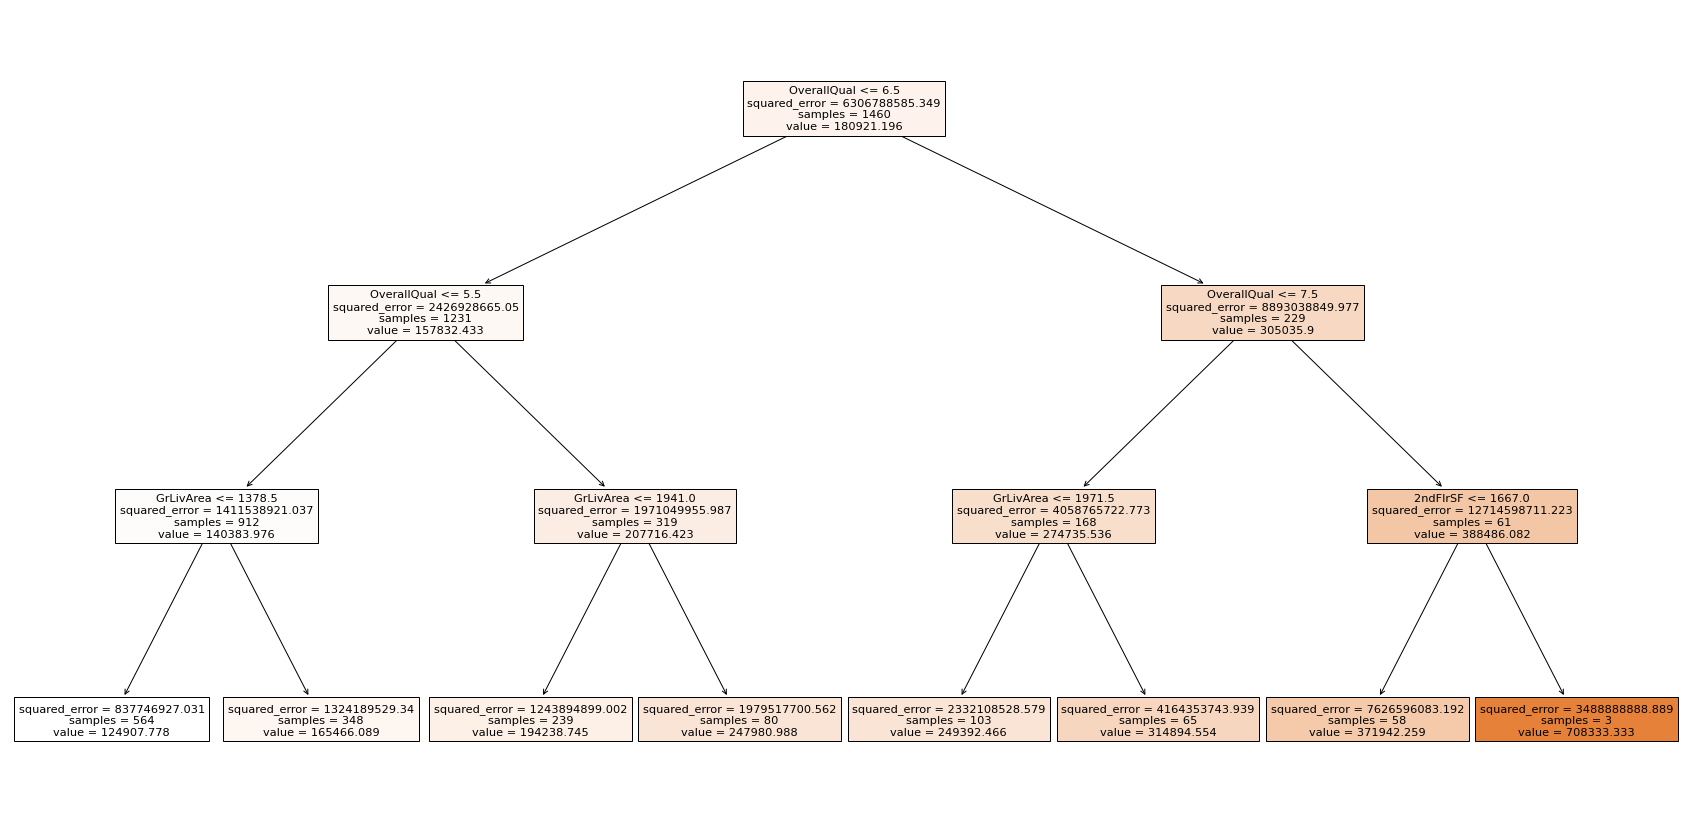

In [113]:
plt.figure(figsize=(30,15))
plot_tree(tree2model,feature_names=X.columns,filled=True)

In [114]:
# Tree Based Models - Multi Tree Models - Ensemble Methods - 
# 1) Bagging or Bootstrap Aggregating - Algorithm - Random Forest
# Random refers to sampling method and Forest refers to multiple trees.
# Step 1 - Specify number of decision trees to be built (n_estimators=1000)
# Step 2 - 1000 samples of data will be created using random sampling method
# and for each sample 65% of observations(randomly sampled) and 
# sqrt(number of variables per sample)
# Sampling method apart from being random also uses bootstrapping or
# data with replacement method. Observations and variables will appear in
# multiple samples thereby in multiple trees.
# Step 3 - Upon completion of 1000 samples, decision trees are parallelly
# built i.e one sample one decision tree and parallelization is possible
# as each sample is independent.
# Splitting methods are Gini and Entropy & Information gain
# Step 4 - Each tree will also predict
# Step 5 - Aggregation of predictions - classification (majority voting)
# Regression (Average method)

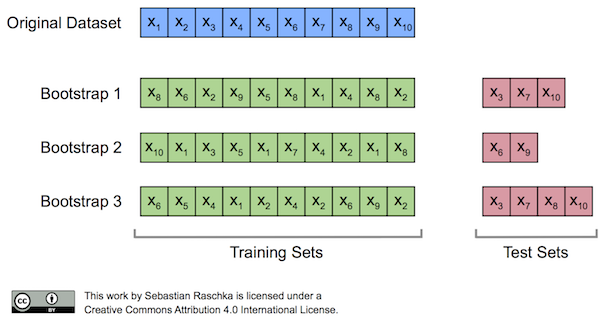
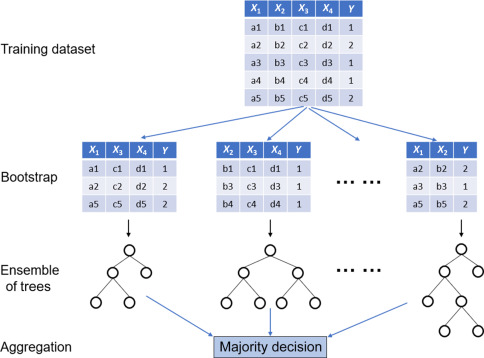

In [116]:
# Tree Based Models - Multi tree Models - Ensemble Methods 
# Boosting - Algorithm - Gradient Boosting Machines (GBM)
# GBM is developed to work particularly on weak learners or wrong predictions
# Step 1 - Specify the number of trees to be built (n_estimators=1000)
# Step2 - Create Sample 1 randomly selected 65% of rows and sqrt(num of cols)
# Step 3 - Build Decision Tree for Sample 1 and also predict
# Step 4 - Identify the wrong predictions and move them to Sample 2.
# Step 5 - Replenish Sample 2 with more data 
# Step 6 - Build Decision tree 2 for Sample 2 and predict
# step 7 - Identify wrong predictions and move them to sample 3
# continue......
# Sequenctial Buildding of Decision trees as each tree is dependent on
# previous trees for sample.
# More weightage is given to wrong predictions in the sample.
# Boosting weak learners through multiple trees will decrease the prediction
# error to some extent.

# Majority Voting for Classification and Average method for regression

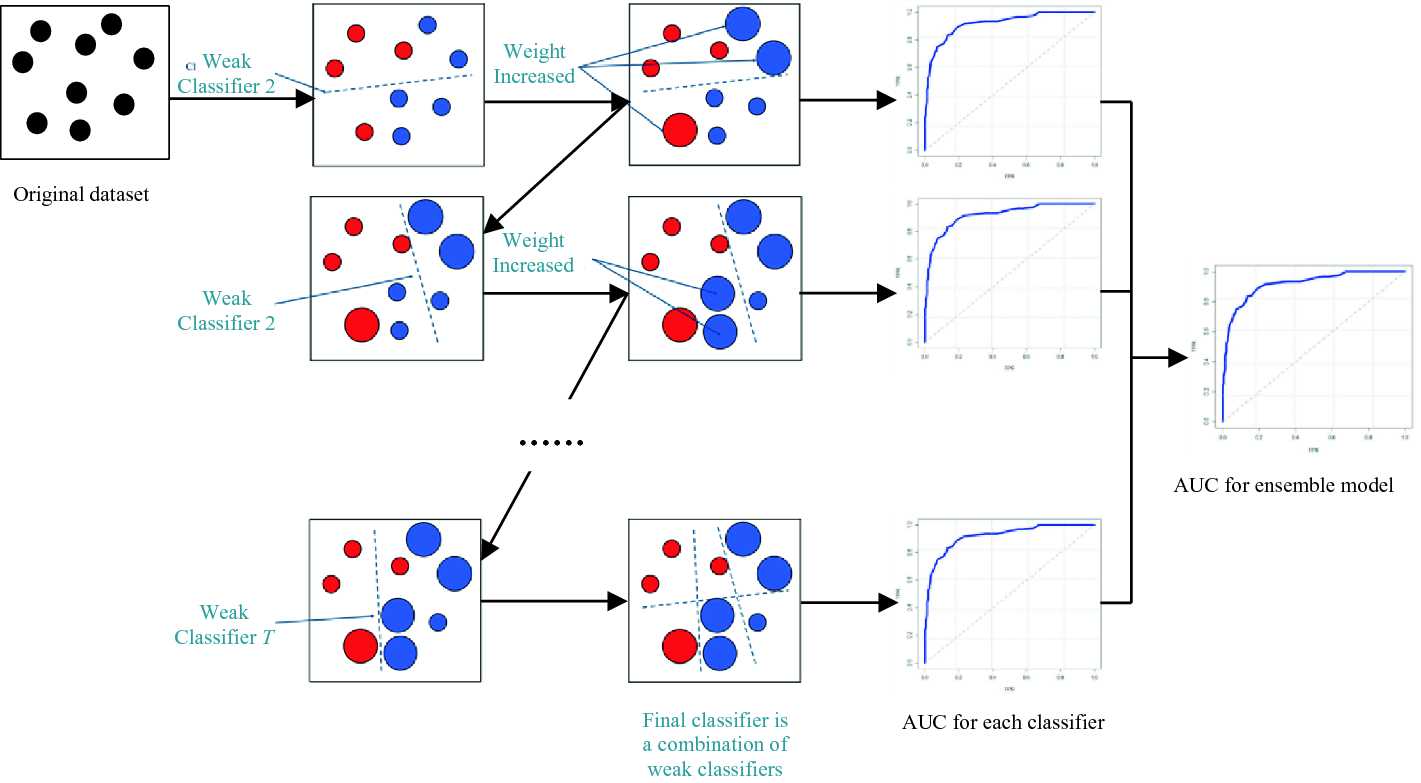

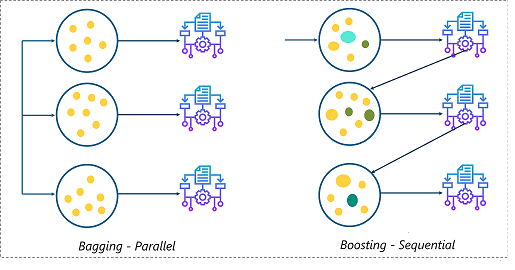

In [117]:
from sklearn.ensemble import RandomForestRegressor

In [123]:
RF=RandomForestRegressor(n_estimators=3000)

In [124]:
RFmodel=RF.fit(X,y)

In [125]:
RFmodel.score(X,y)

0.98204973058465

In [126]:
RFpredict=RFmodel.predict(housetestdf)

In [127]:
pd.DataFrame(RFpredict).to_csv("RF.csv")

In [128]:
from sklearn.ensemble import GradientBoostingRegressor

In [129]:
gbm=GradientBoostingRegressor(n_estimators=3000)

In [130]:
gbmmodel=gbm.fit(X,y)

In [131]:
gbmmodel.score(X,y)

0.9999627942855607

In [132]:
gbmpredict=gbmmodel.predict(housetestdf)

In [133]:
pd.DataFrame(gbmpredict).to_csv("gbm.csv")